In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sun Apr  3 14:36:16 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0    25W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Installing Java, Spark, and Findspark

In [2]:
%%bash
sudo apt-get update
apt-get install openjdk-8-jdk-headless -qq > /dev/null
[ ! -e "$(basename spark-3.1.2-bin-hadoop2.7.tgz)" ] && wget  http://apache.osuosl.org/spark/spark-3.1.2/spark-3.1.2-bin-hadoop2.7.tgz  
tar xf spark-3.1.2-bin-hadoop2.7.tgz
pip install -q findspark
pip install pyspark

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [80.8 kB]
Hit:11 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:12 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages [950 kB]
Get:13 htt

--2022-04-03 14:36:52--  http://apache.osuosl.org/spark/spark-3.1.2/spark-3.1.2-bin-hadoop2.7.tgz
Resolving apache.osuosl.org (apache.osuosl.org)... 140.211.166.134, 64.50.233.100, 64.50.236.52, ...
Connecting to apache.osuosl.org (apache.osuosl.org)|140.211.166.134|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 224445805 (214M) [application/x-gzip]
Saving to: ‘spark-3.1.2-bin-hadoop2.7.tgz’

     0K .......... .......... .......... .......... ..........  0%  193K 18m53s
    50K .......... .......... .......... .......... ..........  0%  386K 14m10s
   100K .......... .......... .......... .......... ..........  0%  386K 12m36s
   150K .......... .......... .......... .......... ..........  0%  341M 9m27s
   200K .......... .......... .......... .......... ..........  0%  386K 9m27s
   250K .......... .......... .......... .......... ..........  0%  356M 7m52s
   300K .......... .......... .......... .......... ..........  0%  462M 6m45s
   350K .......... ...

Setting up Environment Variables for spark and java

In [3]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop2.7"

#1
assembling a resilient distributed dataset, or RDD. In Spark, an immutable distributed collection of object sets is called an RDD. Every RDD is divided into several divisions (similar patterns with smaller sets), which could be calculated on various cluster nodes.

In [4]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

# get a spark session. 
spark = SparkSession.builder.master("local[*]").getOrCreate()

#2
establishing a dataframe with the arguments argument header=True to utilize the first line as column names rather than inserting it as a row and argument inferSchema=True to allow the dataframe to build its own schema

In [5]:
! [ ! -e "$(basename dashboard-data-latest2.csv)" ] && wget https://storage.googleapis.com/venkat-alapati/dashboard-data-latest2.csv
df = spark.read.csv('dashboard-data-latest2.csv',header= True, inferSchema = True)



--2022-04-03 14:38:16--  https://storage.googleapis.com/venkat-alapati/dashboard-data-latest2.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.125.128, 142.250.157.128, 142.251.8.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.125.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49020265 (47M) [text/csv]
Saving to: ‘dashboard-data-latest2.csv’

dashboard-data-late 100%[===================>]  46.75M  47.7MB/s    in 1.0s    

2022-04-03 14:38:17 (47.7 MB/s) - ‘dashboard-data-latest2.csv’ saved [49020265/49020265]



#3
Cleaning the column names

In [6]:
df = df.toDF(*[value.lower().replace(' ', '') for value in df.columns])


#4
Viewing column names using columns method



In [7]:
print(df.columns)

['country', 'fcs', 'incomegroup', 'indicator', 'indicatordescription', 'indicatordisplay', 'industry', 'lendingcategory', 'measuretype', 'month', 'region', 'rowid', 'source', 'surveylink', 'unitmeasure', 'urbanrural', 'wave', 'weighttype', 'year', 'gdp', 'indicatorval', 'sampletotal']


#5
Viewing top 5 rows of dataframe


In [8]:
df.show(5)

+-----------+--------------------+-----------+----------------+--------------------+--------------------+--------+---------------+-----------+-----+----------+-----+--------------------+----------+--------------------+----------+-----+-----------------+----+-----------+------------+-----------+
|    country|                 fcs|incomegroup|       indicator|indicatordescription|    indicatordisplay|industry|lendingcategory|measuretype|month|    region|rowid|              source|surveylink|         unitmeasure|urbanrural| wave|       weighttype|year|        gdp|indicatorval|sampletotal|
+-----------+--------------------+-----------+----------------+--------------------+--------------------+--------+---------------+-----------+-----+----------+-----+--------------------+----------+--------------------+----------+-----+-----------------+----+-----------+------------+-----------+
|Afghanistan|High-Intensity Co...| Low income|      Demo_educ1|% respondent by l...|Level of educatio...|     Al

#6
Checking data types of columns

In [9]:
df.dtypes

[('country', 'string'),
 ('fcs', 'string'),
 ('incomegroup', 'string'),
 ('indicator', 'string'),
 ('indicatordescription', 'string'),
 ('indicatordisplay', 'string'),
 ('industry', 'string'),
 ('lendingcategory', 'string'),
 ('measuretype', 'string'),
 ('month', 'int'),
 ('region', 'string'),
 ('rowid', 'int'),
 ('source', 'string'),
 ('surveylink', 'string'),
 ('unitmeasure', 'string'),
 ('urbanrural', 'string'),
 ('wave', 'string'),
 ('weighttype', 'string'),
 ('year', 'int'),
 ('gdp', 'double'),
 ('indicatorval', 'double'),
 ('sampletotal', 'int')]

#7
Couting no of rows and columns presneted in  data frame

In [10]:
row1 = df.count()
col1 = len(df.columns)
print(f'Dimension of the Dataframe is: {(col1,row1)}')

Dimension of the Dataframe is: (22, 121084)


#8
Dropping NULL values from rows using a filter and saving the result as a new Spark data frame

In [11]:

df=df.filter(df['surveylink'].isNotNull())
row1 = df.count()
col1 = len(df.columns)
print(f'Dimension of the Dataframe is: {(col1,row1)}')
df=df.filter(df['fcs'].isNotNull())
row2 = df.count()
col2 = len(df.columns)
print(f'Dimension of the Dataframe is: {(col2,row2)}')
df.show(5)



Dimension of the Dataframe is: (22, 65249)
Dimension of the Dataframe is: (22, 22783)
+-------+--------------------+-------------------+-----------+--------------------+--------------------+------------+---------------+-----------+-----+--------------------+-----+--------------------+--------------------+--------------------+----------+-----+----------------+----+-----------+------------+-----------+
|country|                 fcs|        incomegroup|  indicator|indicatordescription|    indicatordisplay|    industry|lendingcategory|measuretype|month|              region|rowid|              source|          surveylink|         unitmeasure|urbanrural| wave|      weighttype|year|        gdp|indicatorval|sampletotal|
+-------+--------------------+-------------------+-----------+--------------------+--------------------+------------+---------------+-----------+-----+--------------------+-----+--------------------+--------------------+--------------------+----------+-----+----------------+---

#9
Viewing the schema of dataframe

In [13]:
df.printSchema()

root
 |-- country: string (nullable = true)
 |-- fcs: string (nullable = true)
 |-- incomegroup: string (nullable = true)
 |-- indicator: string (nullable = true)
 |-- indicatordescription: string (nullable = true)
 |-- indicatordisplay: string (nullable = true)
 |-- industry: string (nullable = true)
 |-- lendingcategory: string (nullable = true)
 |-- measuretype: string (nullable = true)
 |-- month: integer (nullable = true)
 |-- region: string (nullable = true)
 |-- rowid: integer (nullable = true)
 |-- source: string (nullable = true)
 |-- surveylink: string (nullable = true)
 |-- unitmeasure: string (nullable = true)
 |-- urbanrural: string (nullable = true)
 |-- wave: string (nullable = true)
 |-- weighttype: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- gdp: double (nullable = true)
 |-- indicatorval: double (nullable = true)
 |-- sampletotal: integer (nullable = true)



#10
Column renaming, saving the immutable dataframe as a pandas dataframe, then utilizing the get and to data frame methods to transform the pandas dataframe into a spark data frame 

In [15]:
mapping = {'indicatordescription':'description','sampletotal':'sample','unitmeasure':'measure'}
new_names = [mapping.get(col,col) for col in df.columns] 
pandas_df=df.toDF(*new_names).toPandas()
df1=spark.createDataFrame(pandas_df) 
df1.show(5)


+-------+--------------------+-------------------+-----------+--------------------+--------------------+------------+---------------+-----------+-----+--------------------+-----+--------------------+--------------------+--------------------+----------+-----+----------------+----+-----------+------------+------+
|country|                 fcs|        incomegroup|  indicator|         description|    indicatordisplay|    industry|lendingcategory|measuretype|month|              region|rowid|              source|          surveylink|             measure|urbanrural| wave|      weighttype|year|        gdp|indicatorval|sample|
+-------+--------------------+-------------------+-----------+--------------------+--------------------+------------+---------------+-----------+-----+--------------------+-----+--------------------+--------------------+--------------------+----------+-----+----------------+----+-----------+------------+------+
|Armenia|High-Intensity Co...|Upper middle income|Asse_intern

#11
Droping the columns and saving the data frame

In [17]:
drop_name = ['description','indicatordisplay','industry','indicatorval','surveylink']
pandas_df2=df1.drop(*drop_name).toPandas()
df2=spark.createDataFrame(pandas_df2) 
df2.show(5)

+-------+--------------------+-------------------+-----------+---------------+-----------+-----+--------------------+-----+--------------------+--------------------+----------+-----+----------------+----+-----------+------+
|country|                 fcs|        incomegroup|  indicator|lendingcategory|measuretype|month|              region|rowid|              source|             measure|urbanrural| wave|      weighttype|year|        gdp|sample|
+-------+--------------------+-------------------+-----------+---------------+-----------+-----+--------------------+-----+--------------------+--------------------+----------+-----+----------------+----+-----------+------+
|Armenia|High-Intensity Co...|Upper middle income|Asse_intern|           IBRD|          p|    8|Europe & Central ...| 2212|High Frequency Ph...|Percent of househ...|  National|WAVE1|Household weight|2020|9.521770477|  4545|
|Armenia|High-Intensity Co...|Upper middle income|Asse_intern|           IBRD|          p|    8|Europe &

#11a
Couting no of rows and columns presneted in the cleaned data frame

In [19]:
row1 = df2.count()
col1 = len(df2.columns)
print(f'Dimension of the Dataframe is: {(col1,row1)}')

Dimension of the Dataframe is: (17, 22783)


#12
Run statistics on gdp,sample columns


In [20]:
stat_r = df2.select(['gdp','sample']).describe()
stat_r.show()

+-------+------------------+-----------------+
|summary|               gdp|           sample|
+-------+------------------+-----------------+
|  count|             22783|            22783|
|   mean| 8.115815601395317|2134.472325856999|
| stddev|0.6465696768995057| 637.133632636926|
|    min|       6.846412659|             1500|
|    max|       9.521770477|             4545|
+-------+------------------+-----------------+



#13
Formating the result table

In [21]:
from pyspark.sql.functions import format_number
stat_r.select(format_number(stat_r['gdp'].cast('float'), 2)).show()
stat_r.select(format_number(stat_r['sample'].cast('float'), 2)).show()



+------------------------------------+
|format_number(CAST(gdp AS FLOAT), 2)|
+------------------------------------+
|                           22,783.00|
|                                8.12|
|                                0.65|
|                                6.85|
|                                9.52|
+------------------------------------+

+---------------------------------------+
|format_number(CAST(sample AS FLOAT), 2)|
+---------------------------------------+
|                              22,783.00|
|                               2,134.47|
|                                 637.13|
|                               1,500.00|
|                               4,545.00|
+---------------------------------------+



#14
Further analysis using group by method

In [22]:
df2.groupBy('region').count().show()

+--------------------+-----+
|              region|count|
+--------------------+-----+
|  Sub-Saharan Africa|17723|
|Europe & Central ...|  350|
| East Asia & Pacific| 1805|
|Middle East & Nor...| 2905|
+--------------------+-----+



#15
Using the pivot approach, determine the relationship between sample count, GDP, and income group

In [23]:
df2.groupBy(['gdp']).pivot('incomegroup').sum('sample').show()

+-----------+----------+-------------------+-------------------+
|        gdp|Low income|Lower middle income|Upper middle income|
+-----------+----------+-------------------+-------------------+
|8.543931961|      null|            7982612|               null|
|9.299777031|      null|               null|            4731697|
|6.846412659|   2198202|               null|               null|
|8.463731766|      null|            2707500|               null|
|7.705894947|  17974161|               null|               null|
|7.685016155|   8551291|               null|               null|
|7.364943504|   1376911|               null|               null|
| 7.75005579|   1869219|               null|               null|
|9.521770477|      null|               null|            1238090|
+-----------+----------+-------------------+-------------------+



#16
identifying different wave forms, measurements, and indicators


In [24]:
a=df2.select("wave").distinct().count()
print(a)
b=df2.select("measure").distinct().count()
print(b)
c=df2.select("indicator").distinct().count()
print(c)

11
5
135


#17
Counting the numbers of Household  in 'weighttype'

In [26]:

df.where(df["weighttype"] == "Household weight").count()

22060

#18
Finding mean of samples

In [28]:
from pyspark.sql.functions import mean
df2.select(mean("sample").alias("Mean sample")).show()

+-----------------+
|      Mean sample|
+-----------------+
|2134.472325856999|
+-----------------+



#19
Viewing stats among two columns using crosstab method

In [29]:
df2.stat.crosstab("month", "sample").show()

+------------+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+
|month_sample|1500|1609|1614|1621|1623|1627|1628|1629|1635|1651|1680|1699|1706|1708|1710|1723|1726|1740|1748|1759|1762|1766|1768|1773|1785|1789|1790|1806|1820|1832|1884|1898|1901|1928|1935|1950|1960|1968|2026|2037|2077|2178|2222|2536|2704|2770|2811|2878|3058|3107|3249|3964|4545|
+------------+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+
|           5| 192|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0| 

#20
Finding Max,Min values of samples collected

In [30]:
from pyspark.sql.functions import max,min
df2.select(max("sample"), min("sample")).show()

+-----------+-----------+
|max(sample)|min(sample)|
+-----------+-----------+
|       4545|       1500|
+-----------+-----------+



#21
Seeing list of available databases with listDatabases

In [31]:
spark.catalog.listDatabases()


[Database(name='default', description='default database', locationUri='file:/content/spark-warehouse')]

#22
Creating New Database

In [32]:
spark.sql('create database tej')

DataFrame[]

In [33]:
spark.catalog.listDatabases()

[Database(name='default', description='default database', locationUri='file:/content/spark-warehouse'),
 Database(name='tej', description='', locationUri='file:/content/spark-warehouse/tej.db')]

#23
Seeing list of databases with sql('show databases')

In [34]:
spark.sql('show databases').show()

+---------+
|namespace|
+---------+
|  default|
|      tej|
+---------+



#24
Seeing currentDatabase

In [35]:
spark.catalog.currentDatabase()


'default'

#25
Creating a Table in both local and global space

In [42]:
from pyspark.sql.readwriter import DataFrameWriterV2
#covid_20 = spark.read.option('header', 'true').load(df4)
df2.createOrReplaceTempView("covid_20")
df2.createOrReplaceGlobalTempView("covid_21")


#26
Viewing list of tables created in default space

In [43]:
spark.catalog.listTables('default')

[Table(name='covid_20', database=None, description=None, tableType='TEMPORARY', isTemporary=True)]

#27
Viewing list of tables created in default and global space in a table format

In [45]:
spark.sql('show tables from default').show()

+--------+---------+-----------+
|database|tableName|isTemporary|
+--------+---------+-----------+
|        | covid_20|       true|
+--------+---------+-----------+



In [46]:
spark.sql('show tables from global_temp').show()

+-----------+---------+-----------+
|   database|tableName|isTemporary|
+-----------+---------+-----------+
|global_temp| covid_21|       true|
|           | covid_20|       true|
+-----------+---------+-----------+



#28
Visualizing using select and seaborn

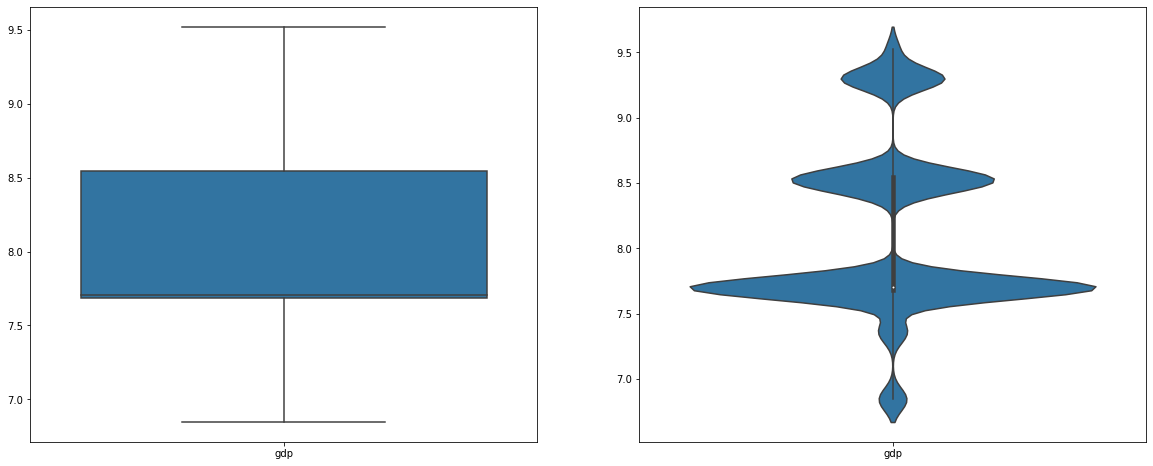

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
x = df2.select(df2['gdp']).toPandas()
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(1, 2, 1)
ax = sns.boxplot(data=x)
ax = fig.add_subplot(1, 2, 2)
ax = sns.violinplot(data=x)

#29
utilizing the F and Window methods to create meaningful statistical data from the indicator and gdp columns 

In [41]:
from pyspark.sql import functions as F
from pyspark.sql.functions import rank,sum,col 
from pyspark.sql import Window
window = Window.rowsBetween(Window.unboundedPreceding,Window.unboundedFollowing)
tab = df2.select(['indicator','gdp']).\
   groupBy('indicator').\
   agg(F.count('gdp').alias('gdp_num'),
       F.mean('gdp').alias('gdp_avg'),
       F.min('gdp').alias('gdp_min'),
       F.max('gdp').alias('gdp_max')).\
   withColumn('total',sum(col('gdp_num')).over(window)).\
   withColumn('Percent',col('gdp_num')*100/col('total')).\
   drop(col('total'))
tab.show()


+-----------------+-------+-----------------+-----------+-----------+--------------------+
|        indicator|gdp_num|          gdp_avg|    gdp_min|    gdp_max|             Percent|
+-----------------+-------+-----------------+-----------+-----------+--------------------+
|      Inco_remitt|     72|7.698510520999999|6.846412659|8.543931961| 0.31602510643901155|
|   Labo_nonormalf|    162|7.798602480876542|6.846412659|8.543931961|   0.711056489487776|
|      Prev_Sfood2|    450|8.204637301737776|6.846412659|9.299777031|  1.9751569152438222|
|    Safe_coverjob|     34|8.554098353588234|7.705894947|9.521770477| 0.14923407804064434|
|     Educ_teacher|    229|8.013470308144106|7.364943504|8.543931961|   1.005135407979634|
|        Heal_need|    212|8.069631443773583|6.846412659|9.299777031|  0.9305183689593117|
|        Educ_comp|    217|7.988571057018434|7.364943504|8.543931961|  0.9524645569064654|
|   Inco_WaLI_prew|    137|7.931404242591245|7.685016155|8.463731766|   0.601325549752008|

The ways in which pandas and spark differ

1. Pandas can be slow to operate when we utilize a lot of datasets, but Spark has an integrated API to operate data, therefore it operates faster than Pandas.

2. Pandas will not allow parallelization, but Spark DataFrame will

3. When using Spark, complex operations are more challenging to complete than using Pandas DataFrame.

4. Python cannot be utilized to create scalable applications; instead, Spark DataFrames are a great tool for doing so.

6. Pandas Dataframe supports numerous file formats and spark data frames won't support 5.Spark DataFrame ensures fault tolerance and pandas DF won't

7.Pandas supports several algorithms, whereas Spark has very few of them.
